# [MPR model from tvbk](https://github.com/Ziaeemehr/vbi_paper/blob/main/docs/examples/mpr_tvbk.ipynb)


<a href="https://colab.research.google.com/github/Ziaeemehr/vbi_paper/blob/main/docs/examples/mpr_tvbk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Check if tvbk is available, else install it

In [1]:
import subprocess
import sys

try:
    import tvbk
except ImportError:
    print("tvbk not found. Installing...")
    try:
        # Clone the repository
        subprocess.check_call(
            ["git", "clone", "--branch", "master", "https://github.com/maedoc/tvbk.git"]
        )

        # Change directory to the cloned repository
        subprocess.check_call(
            [
                "bash",
                "-c",
                "cd tvbk && "
                "pip install nanobind 'scikit-build-core[pyproject]' pytest pytest-benchmark numpy cibuildwheel scipy && "
                "pip install --no-build-isolation -Ceditable.rebuild=true -ve .",
            ]
        )
        print("tvbk installed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred during installation: {e}")
        sys.exit(1)

Running cmake --build & --install in /home/ziaee/git/inference/tvbk/build/cp310-cp310-linux_x86_64


In [2]:
import warnings
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
from vbi.models.tvbk import MPR
from vbi import report_cfg

warnings.filterwarnings("ignore")

In [3]:
seed = 2 
np.random.seed(seed)

LABESSIZE = 14
plt.rcParams['axes.labelsize'] = LABESSIZE
plt.rcParams['xtick.labelsize'] = LABESSIZE
plt.rcParams['ytick.labelsize'] = LABESSIZE

In [4]:
nn = 6
weights = nx.to_numpy_array(nx.complete_graph(nn))
params = {
    "G": 0.0,
    "weights": weights,
    "delays": np.ones_like(weights),
    "num_time": 1000,
    "num_batch": 1,
    "noise_amp": 0.0,
    "dt": 0.01,
    "tau": 1.0,
    "I": 2.1,
    "eta": -4.6,
    "decimate_rv": 10,
    "RECORD_BOLD": False,
    "RECORD_RV": True,
}

In [5]:
obj = MPR(params)
data = obj.run()

In [6]:
# obj.p[0,0,:,:]

In [7]:
data['rv_d'].shape

(101, 1, 2, 6, 8)

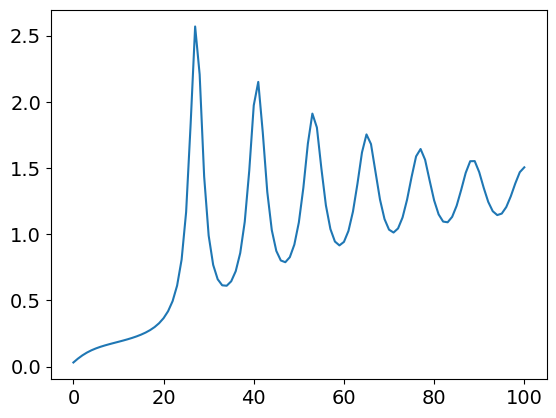

In [8]:
plt.plot(data['rv_d'][:, 0,0,0,0])